 Undersampling for regression

In [ ]:
# pip install imbalanced-learn

import pandas as pd
import seaborn as sns
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv("Numeric data (last year work).csv")
df

# I had to choose Python 3.9.13 in order to utilize imblearn library

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
0,6.50,90000.00,67.00,2023,138,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7.40,24000.00,66.00,2023,116,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,7.00,21000.00,85.00,2023,117,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,7.10,56000.00,54.00,2023,157,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6.60,66000.00,64.00,2023,158,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,6.30,22000.00,67.00,2021,141,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1127,7.10,172000.00,59.00,2008,112,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1128,7.60,198000.00,79.00,1986,96,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1129,6.50,71000.00,46.00,1992,104,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


<Axes: xlabel='Rating', ylabel='Count'>

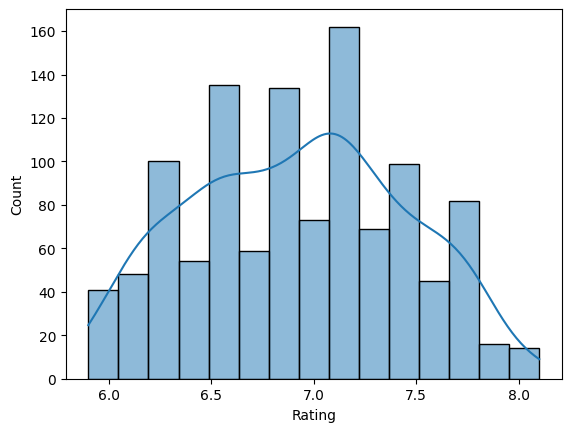

In [17]:
# let's check the distrubution
sns.histplot(data=df, x="Rating", kde=True)

# from my point of view, the distribution is quite okay

In [18]:
# but on the other side, 
# we have some outliers
# and some minor gorups of 6.00 and 7.90 ratings
df['Rating'].value_counts()

7.10    95
7.00    73
7.30    69
6.60    69
6.80    67
7.20    67
6.90    67
6.50    66
6.70    59
6.40    54
6.30    52
7.50    51
7.40    48
6.20    48
6.10    48
7.70    45
7.60    45
7.80    37
5.90    23
6.00    18
7.90    16
8.00     7
8.10     7
Name: Rating, dtype: int64

In [19]:
# checking correlation before modifactions
df.corr()

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
Rating,1.00,0.37,0.53,-0.28,0.18,-0.14,-0.08,0.09,0.15,-0.08,...,0.01,0.07,-0.18,NaN,0.12,-0.03,NaN,-0.08,-0.03,-0.05
Votes,0.37,1.00,0.14,-0.17,0.18,0.22,0.17,-0.00,-0.06,-0.09,...,-0.02,-0.08,0.16,NaN,-0.06,-0.06,NaN,-0.07,-0.06,-0.06
Meta Score,0.53,0.14,1.00,0.03,0.05,-0.21,-0.11,0.10,0.07,-0.05,...,0.01,-0.01,-0.20,NaN,0.17,0.01,NaN,-0.01,-0.02,-0.01
Year,-0.28,-0.17,0.03,1.00,0.08,0.03,0.01,0.07,0.09,-0.04,...,-0.05,-0.12,0.07,NaN,0.02,0.05,NaN,0.08,0.05,0.05
Duration,0.18,0.18,0.05,0.08,1.00,0.20,0.07,-0.26,0.16,-0.36,...,-0.05,-0.14,0.11,NaN,0.05,-0.03,NaN,-0.02,-0.04,-0.05
Action,-0.14,0.22,-0.21,0.03,0.20,1.00,0.38,-0.02,-0.11,-0.24,...,-0.04,-0.07,0.21,NaN,-0.11,-0.03,NaN,-0.02,-0.03,-0.03
Adventure,-0.08,0.17,-0.11,0.01,0.07,0.38,1.00,0.33,-0.11,0.00,...,-0.04,0.29,0.16,NaN,-0.37,-0.02,NaN,-0.05,-0.02,0.02
Animation,0.09,-0.00,0.10,0.07,-0.26,-0.02,0.33,1.00,-0.06,0.13,...,-0.01,0.39,-0.16,NaN,-0.24,-0.01,NaN,-0.02,-0.01,0.17
Biography,0.15,-0.06,0.07,0.09,0.16,-0.11,-0.11,-0.06,1.00,-0.12,...,-0.02,-0.04,-0.00,NaN,0.05,-0.01,NaN,-0.02,-0.01,-0.01
Comedy,-0.08,-0.09,-0.05,-0.04,-0.36,-0.24,0.00,0.13,-0.12,1.00,...,-0.05,0.17,-0.01,NaN,-0.15,0.05,NaN,-0.01,0.05,0.05


In [20]:
# Data Augmentation with Noise

# Duplicate underrepresented samples 
# and add small random noise to features and targets.
# This avoids overfitting caused by duplicating 
# the same samples and adds variability to the dataset

# Filter underrepresented samples (e.g., where Rating < 6.5)
underrepresented = df[df["Rating"] < 6.5]

# Generate synthetic samples by adding noise
synthetic_samples = underrepresented.copy()
synthetic_samples["Rating"] += np.random.normal(0, 0.1, len(synthetic_samples))  # Add noise

# Combine original and synthetic samples
df_resampled = pd.concat([df, synthetic_samples], ignore_index=True)

print(df_resampled["Rating"].value_counts())


7.10    95
7.00    73
6.60    69
7.30    69
7.20    67
        ..
6.06     1
6.17     1
6.36     1
6.36     1
6.27     1
Name: Rating, Length: 266, dtype: int64


<Axes: xlabel='Rating', ylabel='Count'>

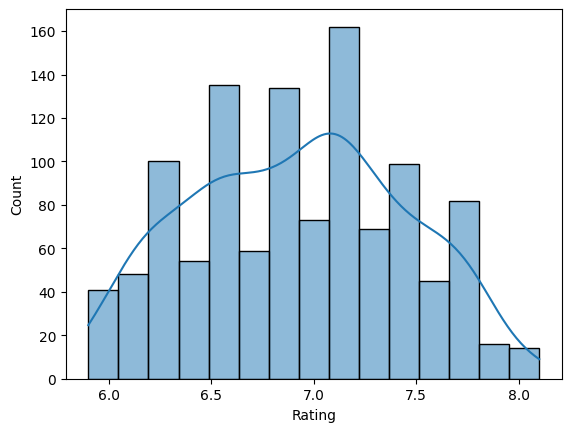

In [21]:
# let's see new distribution
sns.histplot(data=df, x="Rating", kde=True)

# I do not see any difference

In [22]:
df['Rating'].value_counts()

# everything looks the same
# the issue is likely because the synthetic samples 
# I generated are not being counted as separate rows 
# in the value counts. This happens because the synthetic 
# samples may have been slightly adjusted, but the added 
# noise didn't create significant new unique values 
# in the Rating column, 
# so they are not reflected in value_counts().

7.10    95
7.00    73
7.30    69
6.60    69
6.80    67
7.20    67
6.90    67
6.50    66
6.70    59
6.40    54
6.30    52
7.50    51
7.40    48
6.20    48
6.10    48
7.70    45
7.60    45
7.80    37
5.90    23
6.00    18
7.90    16
8.00     7
8.10     7
Name: Rating, dtype: int64

# Option #2

In [24]:
# Round the Ratings to Match Existing Values

# Filter underrepresented samples (e.g., where Rating < 6.5)
underrepresented = df[df["Rating"] < 6.5]

# Generate synthetic samples by adding noise
synthetic_samples = underrepresented.copy()
synthetic_samples["Rating"] += np.random.normal(0, 0.1, len(synthetic_samples))  # Add noise

# Round the ratings to match existing value counts
synthetic_samples["Rating"] = synthetic_samples["Rating"].round(2)

# Combine original and synthetic samples
df_resampled = pd.concat([df, synthetic_samples], ignore_index=True)

# Compare value counts
print("Value counts after resampling:")
print(df_resampled["Rating"].value_counts())


Value counts after resampling:
7.10    95
7.00    73
6.60    70
7.30    69
6.50    68
        ..
5.81     1
5.77     1
5.97     1
5.92     1
5.67     1
Name: Rating, Length: 94, dtype: int64


<Axes: xlabel='Rating', ylabel='Count'>

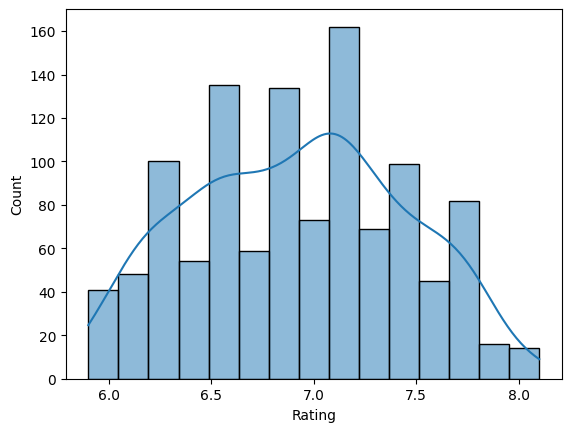

In [26]:
# let's see new distribution
sns.histplot(data=df, x="Rating", kde=True)

# to be honest, it looks the same

In [28]:
df['Rating'].value_counts()

# and values are the same

7.10    95
7.00    73
7.30    69
6.60    69
6.80    67
7.20    67
6.90    67
6.50    66
6.70    59
6.40    54
6.30    52
7.50    51
7.40    48
6.20    48
6.10    48
7.70    45
7.60    45
7.80    37
5.90    23
6.00    18
7.90    16
8.00     7
8.10     7
Name: Rating, dtype: int64

In [29]:
# let's see whether the correlation changed
df.corr()

# no, it is still the same

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
Rating,1.00,0.37,0.53,-0.28,0.18,-0.14,-0.08,0.09,0.15,-0.08,...,0.01,0.07,-0.18,NaN,0.12,-0.03,NaN,-0.08,-0.03,-0.05
Votes,0.37,1.00,0.14,-0.17,0.18,0.22,0.17,-0.00,-0.06,-0.09,...,-0.02,-0.08,0.16,NaN,-0.06,-0.06,NaN,-0.07,-0.06,-0.06
Meta Score,0.53,0.14,1.00,0.03,0.05,-0.21,-0.11,0.10,0.07,-0.05,...,0.01,-0.01,-0.20,NaN,0.17,0.01,NaN,-0.01,-0.02,-0.01
Year,-0.28,-0.17,0.03,1.00,0.08,0.03,0.01,0.07,0.09,-0.04,...,-0.05,-0.12,0.07,NaN,0.02,0.05,NaN,0.08,0.05,0.05
Duration,0.18,0.18,0.05,0.08,1.00,0.20,0.07,-0.26,0.16,-0.36,...,-0.05,-0.14,0.11,NaN,0.05,-0.03,NaN,-0.02,-0.04,-0.05
Action,-0.14,0.22,-0.21,0.03,0.20,1.00,0.38,-0.02,-0.11,-0.24,...,-0.04,-0.07,0.21,NaN,-0.11,-0.03,NaN,-0.02,-0.03,-0.03
Adventure,-0.08,0.17,-0.11,0.01,0.07,0.38,1.00,0.33,-0.11,0.00,...,-0.04,0.29,0.16,NaN,-0.37,-0.02,NaN,-0.05,-0.02,0.02
Animation,0.09,-0.00,0.10,0.07,-0.26,-0.02,0.33,1.00,-0.06,0.13,...,-0.01,0.39,-0.16,NaN,-0.24,-0.01,NaN,-0.02,-0.01,0.17
Biography,0.15,-0.06,0.07,0.09,0.16,-0.11,-0.11,-0.06,1.00,-0.12,...,-0.02,-0.04,-0.00,NaN,0.05,-0.01,NaN,-0.02,-0.01,-0.01
Comedy,-0.08,-0.09,-0.05,-0.04,-0.36,-0.24,0.00,0.13,-0.12,1.00,...,-0.05,0.17,-0.01,NaN,-0.15,0.05,NaN,-0.01,0.05,0.05


In [ ]:
# outcomes:

# I tried 2 variants of undersampling for regression
# 1. Data Augmentation with Noise
# 2. Round the Ratings to Match Existing Values
# but it seems to me that it did not have any influence 
# on data and correlations